In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# manually add a2e-mmc repos to PYTHONPATH if needed
import os, sys
module_path = os.path.join(os.environ['HOME'],'a2e-mmc')
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import assessment.studies.profile_assimilation_wrf.helpers as helper
import mmctools.plotting as mplt

# update units set to conform to BLM style, e.g., [m s^-1] instead of [m/s]
mplt.standard_fieldlabels = mplt.fieldlabels_superscript_units
mplt.standard_spectrumlabels = mplt.spectrumlabels_superscript_units

In [5]:
import matplotlib as mpl
import matplotlib.dates as mdates
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16

# SWIFT profile assimilation with WRF: Produce figures
written by [Dries Allaerts](mailto:dries.allaerts@nrel.gov)

Produce figures for the paper, "Large-eddy simulation of a diurnal cycle driven by asimilation of mesoscale time-height profiles", submitted to Boundary-Layer Meteorology. This notebook depends on:
- SOWFA simulations driven with
    - Indirect data assimilation (cubic fit)
    - Indirect data assimilation (linear fit)
    - Direct data assimilation
    - Mesoscale budget components
- reference data:
    - WRF data (version 3.7.1), extracted from the actual SOWFA input files
    - TTU tower data, generated in `process_TTU_tower.ipynb`
    - TTU radar data, generated in `process_TTU_radar.ipynb`

---

**UPDATE (2020-05-18)** by [Eliot Quon](mailto:eliot.quon@nrel.gov)
- Add ABL height to Figure 3
- Add sunrise/sunset times to Figures 1, 3, and 4
- Update units and figure labels based on recommendations from BLM copy editor 

---

Main directories on Eagle

In [6]:
datadir = '/projects/mmc/dallaert/profile_assimilation_wrf'
referencedir = '/projects/mmc/dallaert/referenceData'

Name of SOWFA simulation folders

In [7]:
budget_components_data = 'run.tency'
direct_assimilatn_data = 'run.assim'
indrct_assimilatn_data = 'run.reg.W.none.Fw0'
indrct_assimilatn_M1_data = 'run.reg.M1'

Reference data

In [8]:
# Datasets generated in process_TTU_tower.ipynb, which can be found in
# a2e-mmc/assessment/datasets/SWiFT/
tower_data_10min = 'TTU_tilt_corrected_20131108-09_10min.csv'
tower_data       = 'TTU_tilt_corrected_20131108-09.csv'

# Dataset generated in process_TTU_radar.ipynb, which can be found in
# a2e-mmc/assessment/datasets/SWiFT/
radar_data = 'TTU_obs_QC_20131108.csv'

# WRF data is extracted from the SOWFA input files
wrf_data = 'drivingData'

Heights and times at which spectra are computed

In [9]:
zhub = [80., ]
selected_times = ['2013-11-08 18:00:00','2013-11-08 22:00:00','2013-11-09 06:00:00']

Additional info

In [10]:
# LOCAL times, from https://www.timeanddate.com/sun/usa/lubbock?month=11&year=2013
sunrise = pd.to_datetime('2013-11-08 07:12')
sunset = pd.to_datetime('2013-11-08 17:49')

Output folder to store figures

In [11]:
figuredir = 'Figures'

if not os.path.isdir(figuredir):
    os.makedirs(figuredir)

## 1. Load data

### 1a. Budget components approach

In [12]:
%%time
data = helper.load_sowfa_data(
    os.path.join(datadir,budget_components_data),
    times=selected_times,heights=zhub,
    interval='1h',window_size='10min',
)
budget_components_prob_10min = data[0]
budget_components_prob_60min = data[1]
budget_components_prob_fspec = data[2]
budget_components_pavg_10min = data[3]
budget_components_pavg_60min = data[4]
budget_components_srch = data[5]
budget_components_srch_10min = data[6]
budget_components_srch_60min = data[7]

# CPU times: user 2min 51s, sys: 36.1 s, total: 3min 27s
# Wall time: 3min 29s

Simulation (re)start times: [43200.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
Simulation (re)start times: [43200.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
Simulation (re)start times: [43200.0]
  read Momentum
  read Temperature
Creating dataframe for [ 43202.5  43205.   43207.5 ... 129595.  129597.5 129600. ]
CPU times: user 2min 50s, sys: 31.8 s, total: 3min 22s
Wall time: 3min 21s


### 1b. Direct assimilation approach

In [13]:
%%time
data = helper.load_sowfa_data(
    os.path.join(datadir,direct_assimilatn_data),
    times=selected_times,heights=zhub,
    interval='1h',window_size='10min',
)
direct_assimilatn_prob_10min = data[0]
direct_assimilatn_prob_60min = data[1]
direct_assimilatn_prob_fspec = data[2]
direct_assimilatn_pavg_10min = data[3]
direct_assimilatn_pavg_60min = data[4]
direct_assimilatn_srch = data[5]
direct_assimilatn_srch_10min = data[6]
direct_assimilatn_srch_60min = data[7]

# CPU times: user 2min 55s, sys: 37.8 s, total: 3min 32s
# Wall time: 3min 35s

Simulation (re)start times: [43200.0, 90000.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
Simulation (re)start times: [43200.0, 90000.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
Simulation (re)start times: [43200.0, 90000.0]
  read Momentum
  read Temperature
Creating dataframe for [ 43202.5  43205.   43207.5 ... 129595.  129597.5 129600. ]
CPU times: user 2min 49s, sys: 34.2 s, total: 3min 23s
Wall time: 3min 22s


### 1c. Indirect assimilation approach (cubic fit)

In [14]:
%%time
data = helper.load_sowfa_data(
    os.path.join(datadir,indrct_assimilatn_data),
    times=selected_times,heights=zhub,
    interval='1h',window_size='10min',
)
indrct_assimilatn_prob_10min = data[0]
indrct_assimilatn_prob_60min = data[1]
indrct_assimilatn_prob_fspec = data[2]
indrct_assimilatn_pavg_10min = data[3]
indrct_assimilatn_pavg_60min = data[4]
indrct_assimilatn_srch = data[5]
indrct_assimilatn_srch_10min = data[6]
indrct_assimilatn_srch_60min = data[7]

# CPU times: user 2min 55s, sys: 40.2 s, total: 3min 35s
# Wall time: 3min 46s

Simulation (re)start times: [43200.0, 46800.0, 50400.0, 54000.0, 57600.0, 61200.0, 64800.0, 68400.0, 72000.0, 75600.0, 79200.0, 82800.0, 86400.0, 90000.0, 93600.0, 97200.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
Simulation (re)start times: [43200.0, 46800.0, 50400.0, 54000.0, 57600.0, 61200.0, 64800.0, 68400.0, 72000.0, 75600.0, 79200.0, 82800.0, 86400.0, 90000.0, 93600.0, 97200.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
Simulation (re)start times: [43200.0, 46800.0, 50400.0, 54000.0, 57600.0, 61200.0, 64800.0, 68400.0, 72000.0, 75600.0, 79200.0, 82800.0, 86400.0, 90000.0, 93600.0, 97200.0]
  read Momentum
  read Temperature
Creating dataframe for [ 43202.5  43205.   43207.5 ... 129595.  129597.5 129600. ]
CPU times: user 2min 50s, sys: 26.2 s, total: 3min 16s
Wall time: 3min 20s


### 1d. Indirect assimilation approach (linear fit)

In [15]:
%%time
data = helper.load_sowfa_data(
    os.path.join(datadir,indrct_assimilatn_M1_data),
    times=selected_times,heights=zhub,
    interval='1h',window_size='10min',
)
indrct_assimilatn_M1_prob_10min = data[0]
indrct_assimilatn_M1_prob_60min = data[1]
indrct_assimilatn_M1_prob_fspec = data[2]
indrct_assimilatn_M1_pavg_10min = data[3]
indrct_assimilatn_M1_pavg_60min = data[4]
indrct_assimilatn_M1_srch = data[5]
indrct_assimilatn_M1_srch_10min = data[6]
indrct_assimilatn_M1_srch_60min = data[7]

# CPU times: user 2min 51s, sys: 32.6 s, total: 3min 23s
# Wall time: 3min 25s

Simulation (re)start times: [43200.0]
  read U
  read UU
  read T
Creating dataframe for [ 43200.   43202.5  43205.  ... 129595.  129597.5 129600. ]
Simulation (re)start times: [43200.0]
  read U
  read T
Creating dataframe for [ 43200.5  43201.   43201.5 ... 129599.  129599.5 129600. ]
Simulation (re)start times: [43200.0]
  read Momentum
  read Temperature
Creating dataframe for [ 43202.5  43205.   43207.5 ... 129595.  129597.5 129600. ]
CPU times: user 2min 51s, sys: 29.1 s, total: 3min 20s
Wall time: 3min 16s


### 1e. Estimated ABL heights

The ABL height is determined as a hybrid of two approaches:
1. The minima in vertical kinematic heat flux (i.e., the middle of the entrainment zone), for convective conditions
2. The height at which the horizontal shear stress is linearly extrapolated to zero, for stable conditions (e.g., see Kosovic & Curry 2000).

Where the detected "convective" boundary layer height $\to 0$, i.e., is below a specified `blendheight`, the height of the boundary layer switches to the detected stable height based on shear stress.

In [16]:
ablh = pd.read_csv(os.path.join('data','ABLheight.csv'),
                   parse_dates=['datetime'],index_col=0)

## 2. Load reference data

In [17]:
%%time
tower_10min, tower_60min = helper.load_tower_reference_data(os.path.join(referencedir,tower_data_10min))

# CPU times: user 28.1 ms, sys: 819 µs, total: 28.9 ms
# Wall time: 30.4 ms

CPU times: user 26.5 ms, sys: 2.26 ms, total: 28.7 ms
Wall time: 84.1 ms


In [18]:
%%time
tower_fspec = helper.load_tower_reference_spectra(os.path.join(referencedir,tower_data),
                                                    selected_times,zhub,
                                                    interval='1h',window_size='10min')

# CPU times: user 4.67 s, sys: 369 ms, total: 5.04 s
# Wall time: 5.07 s

CPU times: user 4.69 s, sys: 246 ms, total: 4.94 s
Wall time: 5.11 s


In [19]:
%%time
data = helper.load_wrf_reference_data(os.path.join(datadir,wrf_data))
wrf_pavg_10min = data[0]
wrf_pavg_60min = data[1]
wrf_srch_10min = data[2]
wrf_srch_60min = data[3]
# CPU times: user 3.71 s, sys: 29.8 ms, total: 3.74 s
# Wall time: 3.87 s

CPU times: user 3.76 s, sys: 100 ms, total: 3.86 s
Wall time: 3.88 s


## 3. Plot results

### Figure 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


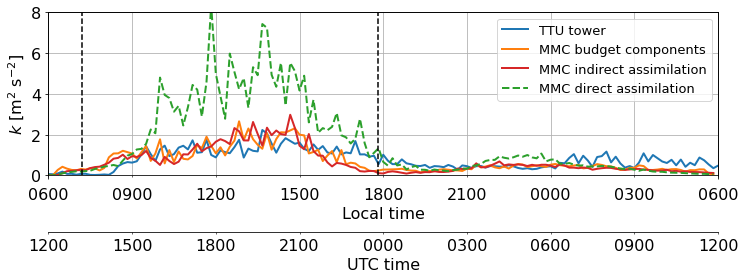

In [20]:
fig,ax,ax2 = mplt.plot_timehistory_at_height(
    datasets={
        'TTU tower': tower_10min,
        'MMC budget components':budget_components_prob_10min,
        'MMC indirect assimilation':indrct_assimilatn_prob_10min,
        'MMC direct assimilation':direct_assimilatn_prob_10min,
    },
    fields=['TKE'],
    fieldlabels={'TKE':'$k$ [m$^2$ s$^{-2}$]'},
    heights=zhub,
    timelimits=('2013-11-08 12:00:00','2013-11-09 12:00:00'),
    plot_local_time='%H%M', local_time_offset=-6,
    fieldlimits=(0,8),
    datasetkwargs={
        'TTU tower':{'linestyle':'-','color':'#1f77b4','linewidth':2},
        'MMC budget components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
    },
)

ax.axvline(sunrise,color='k',ls='--')
ax.axvline(sunset,color='k',ls='--')
    
# Move xs tick down slightly to avoid overlap with y ticks in
ax.tick_params(axis='x', which='minor', pad=10)
ax.tick_params(axis='x', which='major', pad=10)

# Adjust xaxis tick locations
# ax.xaxis.set_major_locator(mpl.dates.AutoDateLocator(minticks=2,maxticks=3))

ax2.set_xticks([]) # hide date on local time axis

# Place legend at the top
# handles, labels = ax.get_legend_handles_labels()
# leg = ax.legend(handles[-1::-1],labels[-1::-1],loc='lower left',bbox_to_anchor=(0.0,1.1,1.0,0.0),
#              borderaxespad=0,fontsize=13,ncol=3,mode='expand')
# leg.get_frame().set_edgecolor('k')

leg = ax.legend(loc='upper right', fontsize=13)

# Save figure
figname = 'TKE_timehistory'
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


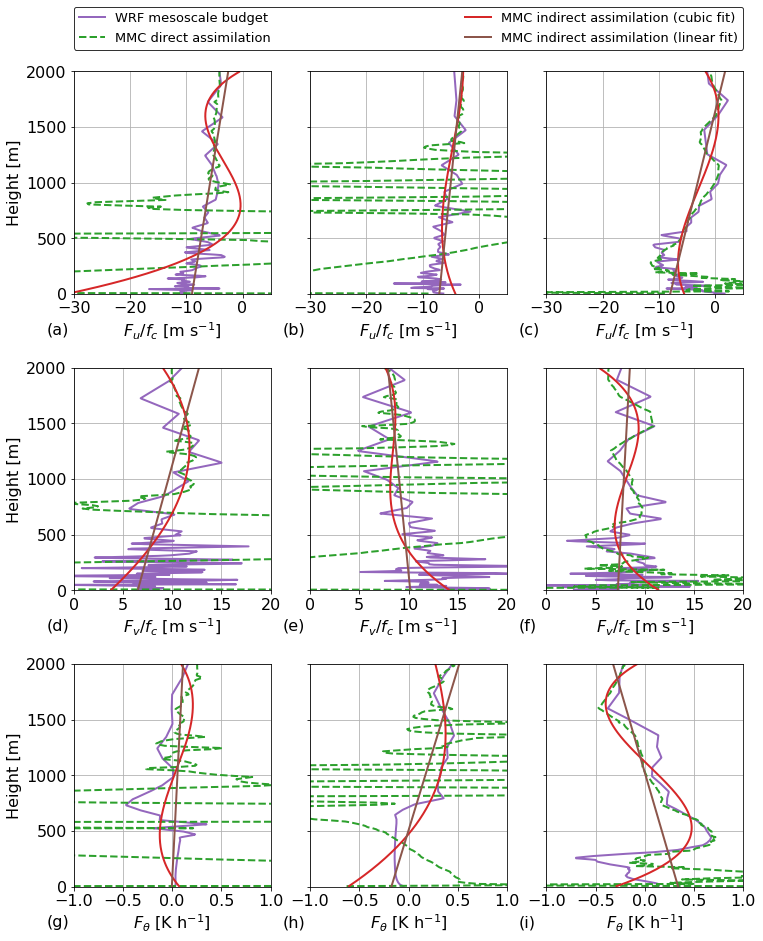

In [21]:
fig,ax = mplt.plot_profile(
    datasets={
        'WRF mesoscale budget':wrf_srch_60min,
        'MMC direct assimilation':direct_assimilatn_srch_60min,
        'MMC indirect assimilation (cubic fit)':indrct_assimilatn_srch_60min,
        'MMC indirect assimilation (linear fit)':indrct_assimilatn_M1_srch_60min,
    },
    times=selected_times,
    fields=['Fu','Fv','Ft'],
    fieldlabels={
        'Fu':r'$F_u/f_c$ [m s$^{-1}$]',
        'Fv':r'$F_v/f_c$ [m s$^{-1}$]',
        'Ft':r'$F_\theta$ [K h$^{-1}$]',
    },
    fieldlimits={
        'Fu':(-30,5),
        'Fv':(0,20),
        'Ft':(-1,1)
    },
    heightlimits=(0,2000),
    stack_by_datasets=True,
    datasetkwargs={
        'WRF mesoscale budget':{'linestyle':'-','color':'#9467bd','linewidth':2},
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
        'MMC indirect assimilation (cubic fit)':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC indirect assimilation (linear fit)':{'linestyle':'-','color':'#8c564b','linewidth':2}
    },
    labelsubplots=True,
)

# Place legend at the top
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].get_legend().remove()

leg = fig.legend(handles, labels, loc = 'lower left', bbox_to_anchor = (.125,.9,.775,0.0),
         borderaxespad=0,ncol=2,fontsize=13,
         bbox_transform = plt.gcf().transFigure,mode='expand')
leg.get_frame().set_edgecolor('k')

# Hide subaxis labels
for axi in ax.ravel():
    axi.set_title(None)
fig.subplots_adjust(hspace=0.33) # shrink vertical space a bit

# Save figure
figname = 'ForceProfiles'
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 3

In [22]:
datasets = {
    'WRF mesoscale budget':wrf_srch_10min,
    'MMC indirect assimilation (cubic fit)':indrct_assimilatn_srch,
    'MMC indirect assimilation (linear fit)':indrct_assimilatn_M1_srch,
    'MMC direct assimilation':direct_assimilatn_srch,
}

0 WRF mesoscale budget
1 MMC indirect assimilation (cubic fit)
2 MMC indirect assimilation (linear fit)
3 MMC direct assimilation


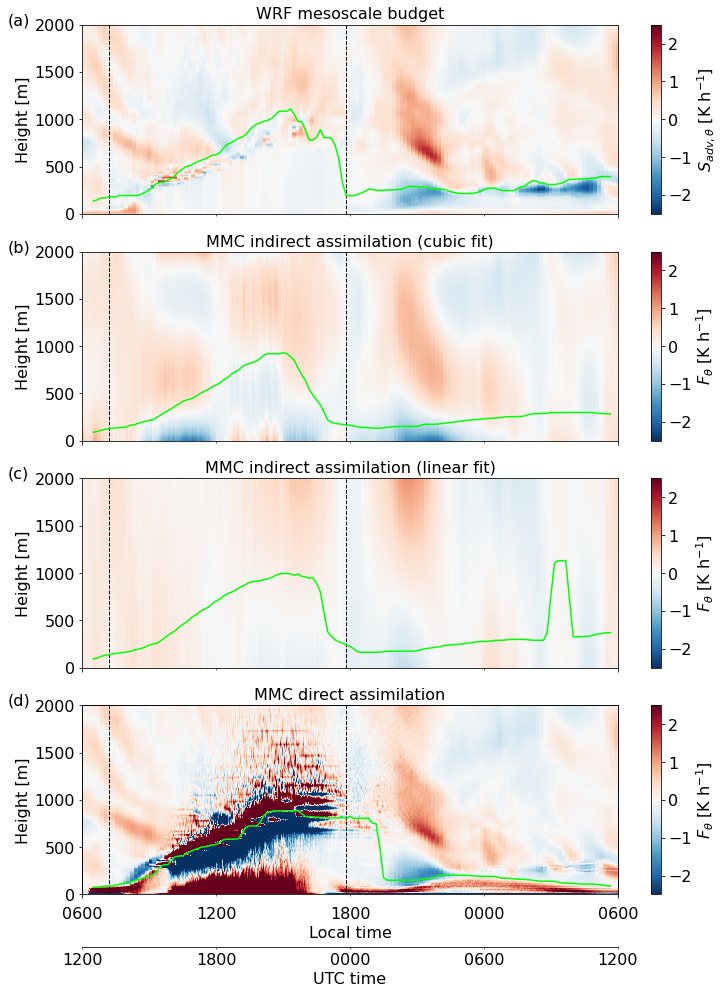

In [23]:
fig,ax = plt.subplots(nrows=4, sharex=True, figsize=(12,16))

# Add estimated ABL height, sunrise/sunset times (EWQ)
# - do this first so that plot_timeheight can format the axes last
utc_to_local = -pd.to_timedelta('6h')
for i,name in enumerate(datasets.keys()):
    print(i,name)
    ax[i].axvline(sunrise,color='k',ls='--',lw=1)
    ax[i].axvline(sunset,color='k',ls='--',lw=1)
    ax[i].plot(ablh.index+utc_to_local, ablh[name], color=[0,1,0])

# Original plot
_,_,ax2,cbars = mplt.plot_timeheight(
    datasets=datasets,
    fields='Ft',
    fieldlabels=r'$F_\theta$ [K h$^{-1}$]',
    fieldlimits=(-2.5,2.5),
    timelimits=('2013-11-08 12:00:00','2013-11-09 12:00:00'),
    plot_local_time='%H%M', local_time_offset=-6,
    #heightlimits=(0,2000),
    colorschemes='RdBu_r',
    labelsubplots=True,
    rasterized=True,
    shading='flat',
    fig=fig,ax=ax,
)
cbars[0].set_label(r'$S_{adv,\theta}$ [K h$^{-1}$]')

# Adjust subfigure spacing
fig.subplots_adjust(wspace=0.2,hspace=0.2)
ax2.spines['bottom'].set_position(('axes',-0.28)) # move local time axis closer to main axes (default: -0.35)

# Move xs tick down slightly to avoid overlap with y ticks in ax[2]
ax[-1].tick_params(axis='x', which='minor', pad=10)
ax[-1].tick_params(axis='x', which='major', pad=10)

# Adjust xaxis tick locations
ax[-1].xaxis.set_minor_locator(mdates.HourLocator(byhour=range(24),interval=6))
#ax[-1].xaxis.set_major_locator(mdates.AutoDateLocator(minticks=2,maxticks=3))
ax2.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(24),interval=6))
ax2.set_xticks([]) # hide date on local time axis

for axi in ax:
    axi.set_ylim((0,2000))

# Save figure
figname = 'Ftcontours'
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


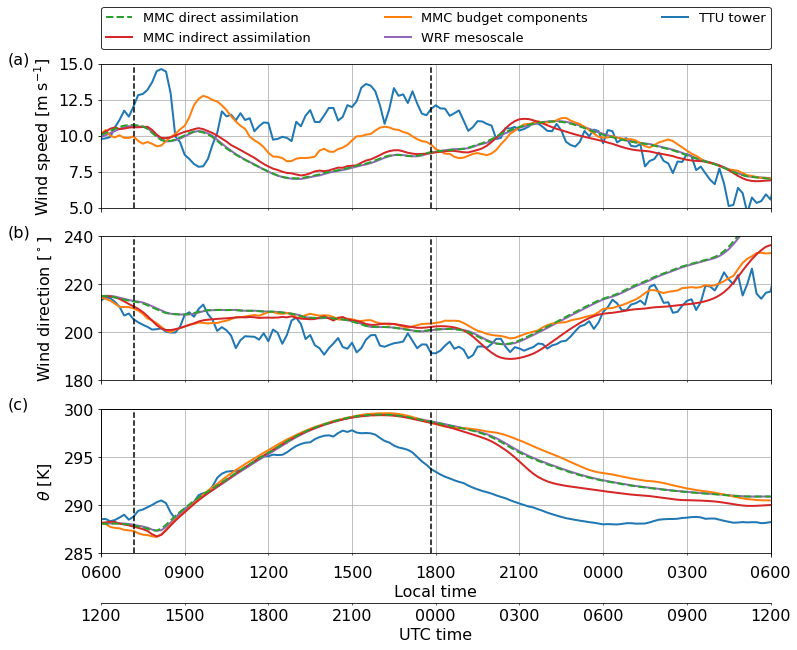

In [24]:
fig,ax,ax2 = mplt.plot_timehistory_at_height(
    datasets={
        'TTU tower': tower_10min,
        'WRF mesoscale':wrf_pavg_10min,
        'MMC budget components':budget_components_pavg_10min,
        'MMC indirect assimilation':indrct_assimilatn_pavg_10min,
        'MMC direct assimilation':direct_assimilatn_pavg_10min,
    },
    fields=['wspd','wdir','theta'],
    #fieldlabels={'theta':r'$\theta_v$ [K]'},
    heights=zhub,
    timelimits=('2013-11-08 12:00:00','2013-11-09 12:00:00'),
    plot_local_time='%H%M', local_time_offset=-6,
    fieldlimits={
        'wspd':(5.,15.),
        'wdir':(180,240),
        'theta':(285,300)
    },
    labelsubplots=True,
    datasetkwargs={
        'TTU tower':{'linestyle':'-','color':'#1f77b4','linewidth':2},
        'WRF mesoscale':{'linestyle':'-','color':'#9467bd','linewidth':2},
        'MMC budget components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
    },
)

for axi in ax:
    axi.axvline(sunrise,color='k',ls='--')
    axi.axvline(sunset,color='k',ls='--')

# Move xs tick down slightly to avoid overlap with y ticks in
ax[-1].tick_params(axis='x', which='minor', pad=10)
ax[-1].tick_params(axis='x', which='major', pad=10)

# Adjust xaxis tick locations
#ax[-1].xaxis.set_major_locator(mpl.dates.AutoDateLocator(minticks=2,maxticks=3))

ax2.set_xticks([]) # hide date on local time axis

# Place legend at the top
handles, labels = ax[0].get_legend_handles_labels()

leg = ax[0].legend(handles[-1::-1],labels[-1::-1],loc='lower left',bbox_to_anchor=(0.0,1.1,1.0,0.0),
             borderaxespad=0,fontsize=13,ncol=3,mode='expand')
leg.get_frame().set_edgecolor('k')

# Save figure
figname = 'mean_timehistory'
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 5

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


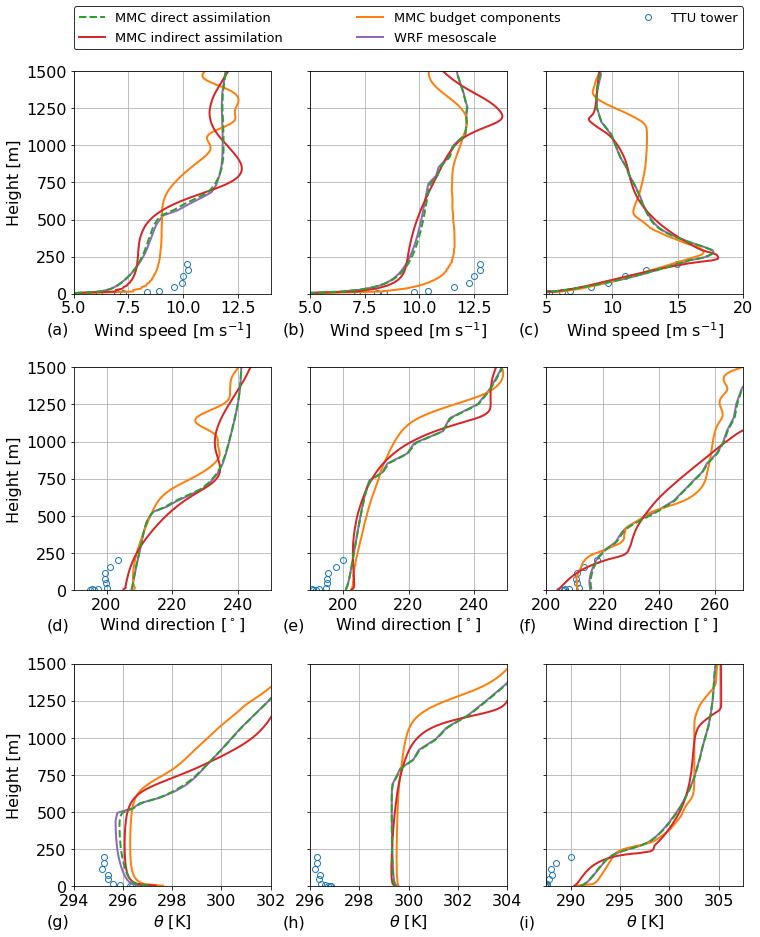

In [25]:
fig,ax = mplt.plot_profile(
    datasets={
        'TTU tower': tower_60min,
        'WRF mesoscale':wrf_pavg_60min,
        'MMC budget components':budget_components_pavg_60min,
        'MMC indirect assimilation':indrct_assimilatn_pavg_60min,
        'MMC direct assimilation':direct_assimilatn_pavg_60min,
    },
    fields=['wspd','wdir','theta'],
    #fieldlabels={'theta':r'$\theta_v$ [K]'},
    times=selected_times,
    fieldlimits={
        'wspd':(5.,14.),
        'wdir':(190,250),
    },
    heightlimits=(0,1500),
    stack_by_datasets=True,
    labelsubplots=True,
    datasetkwargs={
        'TTU tower':{'linestyle':'','marker':'o','mfc':'none','markersize':6,'color':'#1f77b4'},
        'WRF mesoscale':{'linestyle':'-','color':'#9467bd','linewidth':2},
        'MMC budget components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
    },
)

# Set velocity limits
ax[0,2].set_xlim([5,20])
# Set wind direction limits
ax[1,2].set_xlim([200,270])
# Set temperature limits
ax[2,0].set_xlim([294,302])
ax[2,1].set_xlim([296,304])
ax[2,2].set_xlim([287.5,307.5])

# Place legend at the top
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].get_legend().remove()

leg = fig.legend(handles[-1::-1], labels[-1::-1], loc = 'lower left', bbox_to_anchor = (.125,.9,.775,0.0),
         borderaxespad=0,ncol=3,fontsize=13,
         bbox_transform = plt.gcf().transFigure,mode='expand')
leg.get_frame().set_edgecolor('k')

# Hide subaxis labels
for axi in ax.ravel():
    axi.set_title(None)
fig.subplots_adjust(hspace=0.33) # shrink vertical space a bit

# Save figure
figname = 'meanprofiles'
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 6

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


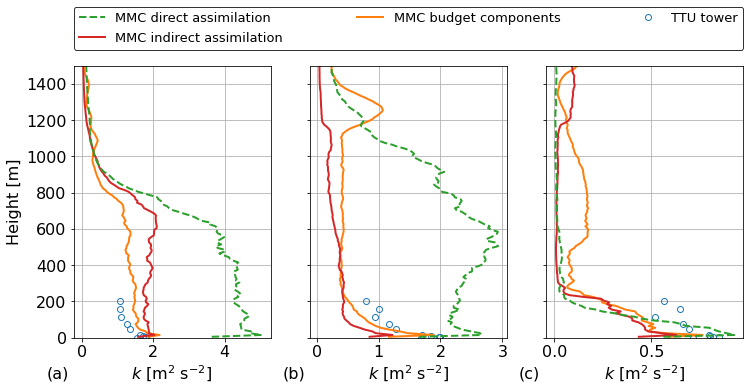

In [26]:
fig,ax = mplt.plot_profile(
    datasets={
        'TTU tower': tower_60min,
        'MMC budget components':budget_components_prob_60min,
        'MMC indirect assimilation':indrct_assimilatn_prob_60min,
        'MMC direct assimilation':direct_assimilatn_prob_60min,
    },
    fields='TKE',
    fieldlabels={'TKE':'$k$ [m$^2$ s$^{-2}$]'},
    times=selected_times,
    heightlimits=(0,1500),
    stack_by_datasets=True,
    labelsubplots=(-0.14,-0.15), #labelsubplots=True,
    datasetkwargs={
        'TTU tower':{'linestyle':'','marker':'o','mfc':'none','markersize':6,'color':'#1f77b4'},
        'MMC budget components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'--','color':'#2ca02c','linewidth':2},
    },
)

# Place legend at the top
handles, labels = ax[2].get_legend_handles_labels()
ax[2].get_legend().remove()

leg = fig.legend(handles[-1::-1], labels[-1::-1], loc = 'lower left', bbox_to_anchor = (.125,.925,.775,0.0),
         borderaxespad=0,ncol=3,fontsize=13,
         bbox_transform = plt.gcf().transFigure,mode='expand')
leg.get_frame().set_edgecolor('k')

# Hide subaxis labels
for axi in ax.ravel():
    axi.set_title(None)

# Save figure
figname = 'TKEprofiles'
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.pdf'),bbox_inches='tight')

### Figure 7

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


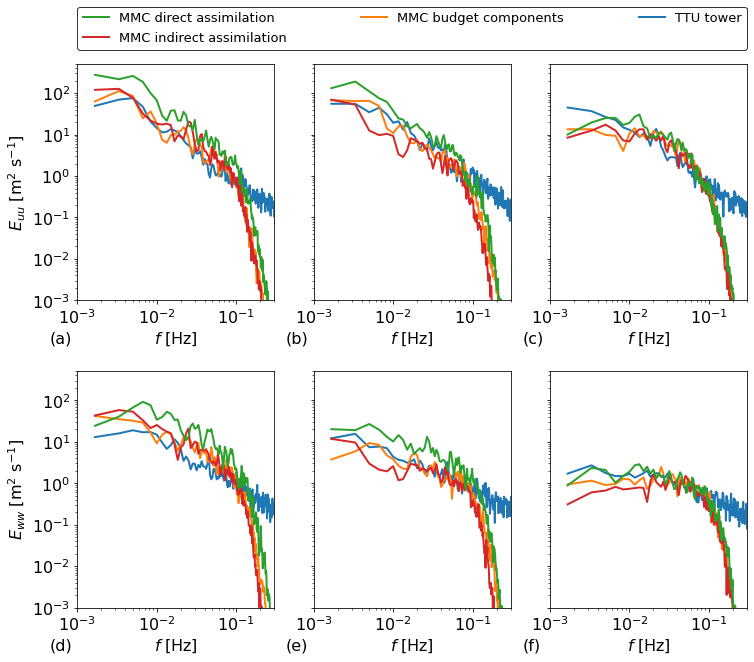

In [28]:
fig,ax = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(12,10)) # retain x labels on all panels

_,_ = mplt.plot_spectrum(
    datasets={
        'TTU tower': tower_fspec,
        'MMC budget components':budget_components_prob_fspec,
        'MMC indirect assimilation':indrct_assimilatn_prob_fspec,
        'MMC direct assimilation':direct_assimilatn_prob_fspec,
    },
    height=zhub,
    times=selected_times,
    fields=['wspd','w'],
    fieldlabels={
        'wspd':'$E_{uu}$ [m$^2$ s$^{-1}$]',
        'w':'$E_{ww}$ [m$^2$ s$^{-1}$]',
    },
    freqlimits=(0.001,0.3),
    fieldlimits={
        'wspd':(1.0e-3,5.0e2),
        'w':(1.0e-3,5.0e2)
    },
    labelsubplots=True, #labelsubplots=(-0.14,1.0),
    datasetkwargs={
        'TTU tower':{'linestyle':'-','color':'#1f77b4','linewidth':2},
        'MMC budget components':{'linestyle':'-','color':'#ff7f0e','linewidth':2},
        'MMC indirect assimilation':{'linestyle':'-','color':'#d62728','linewidth':2},
        'MMC direct assimilation':{'linestyle':'-','color':'#2ca02c','linewidth':2},
    },
    fig=fig,ax=ax,
)

# Place legend at the top
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].get_legend().remove()

leg = fig.legend(handles[-1::-1], labels[-1::-1], loc = 'lower left', bbox_to_anchor = (.125,.9,.775,0.0),
         borderaxespad=0,ncol=3,fontsize=13,
         bbox_transform = plt.gcf().transFigure,mode='expand')
leg.get_frame().set_edgecolor('k')

# Hide subaxis labels
for axi in ax.ravel():
    axi.set_xlim((1e-3, 3e-1))
    axi.set_xlabel('$f$ [Hz]')
    axi.set_title(None)
fig.subplots_adjust(hspace=0.3) # shrink vertical space a bit

# Save figure
figname = 'spectrum'
plt.savefig(os.path.join(figuredir,figname+'.png'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.eps'),bbox_inches='tight')
plt.savefig(os.path.join(figuredir,figname+'.pdf'),bbox_inches='tight')